# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Все данные были собраны в одной cvs таблице.

**План исследования**:
1. Изучение общей информации о cvs таблице с данными.

2. Предобработка данных 
 - заполнение пропусков там, где это возможно; 
 - изменение типа данных в тех столбцах, где это нужно;
 - изучение уникальных значений в столбце с названиями и устранение неявных дубликатов.

3. Добавление в исходную таблицу новых столбцов со следующими параметрами:
 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - расстояние до центра города в километрах.

4. Исследовательский анализ данных.

5. Составление общего вывода о проделанном исследовании.

### Изучение общей информации о cvs таблице с данными. 

In [1]:
#импортируем нужные библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [2]:
data = pd.read_csv(r'C:\Users\nadya\Downloads\real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

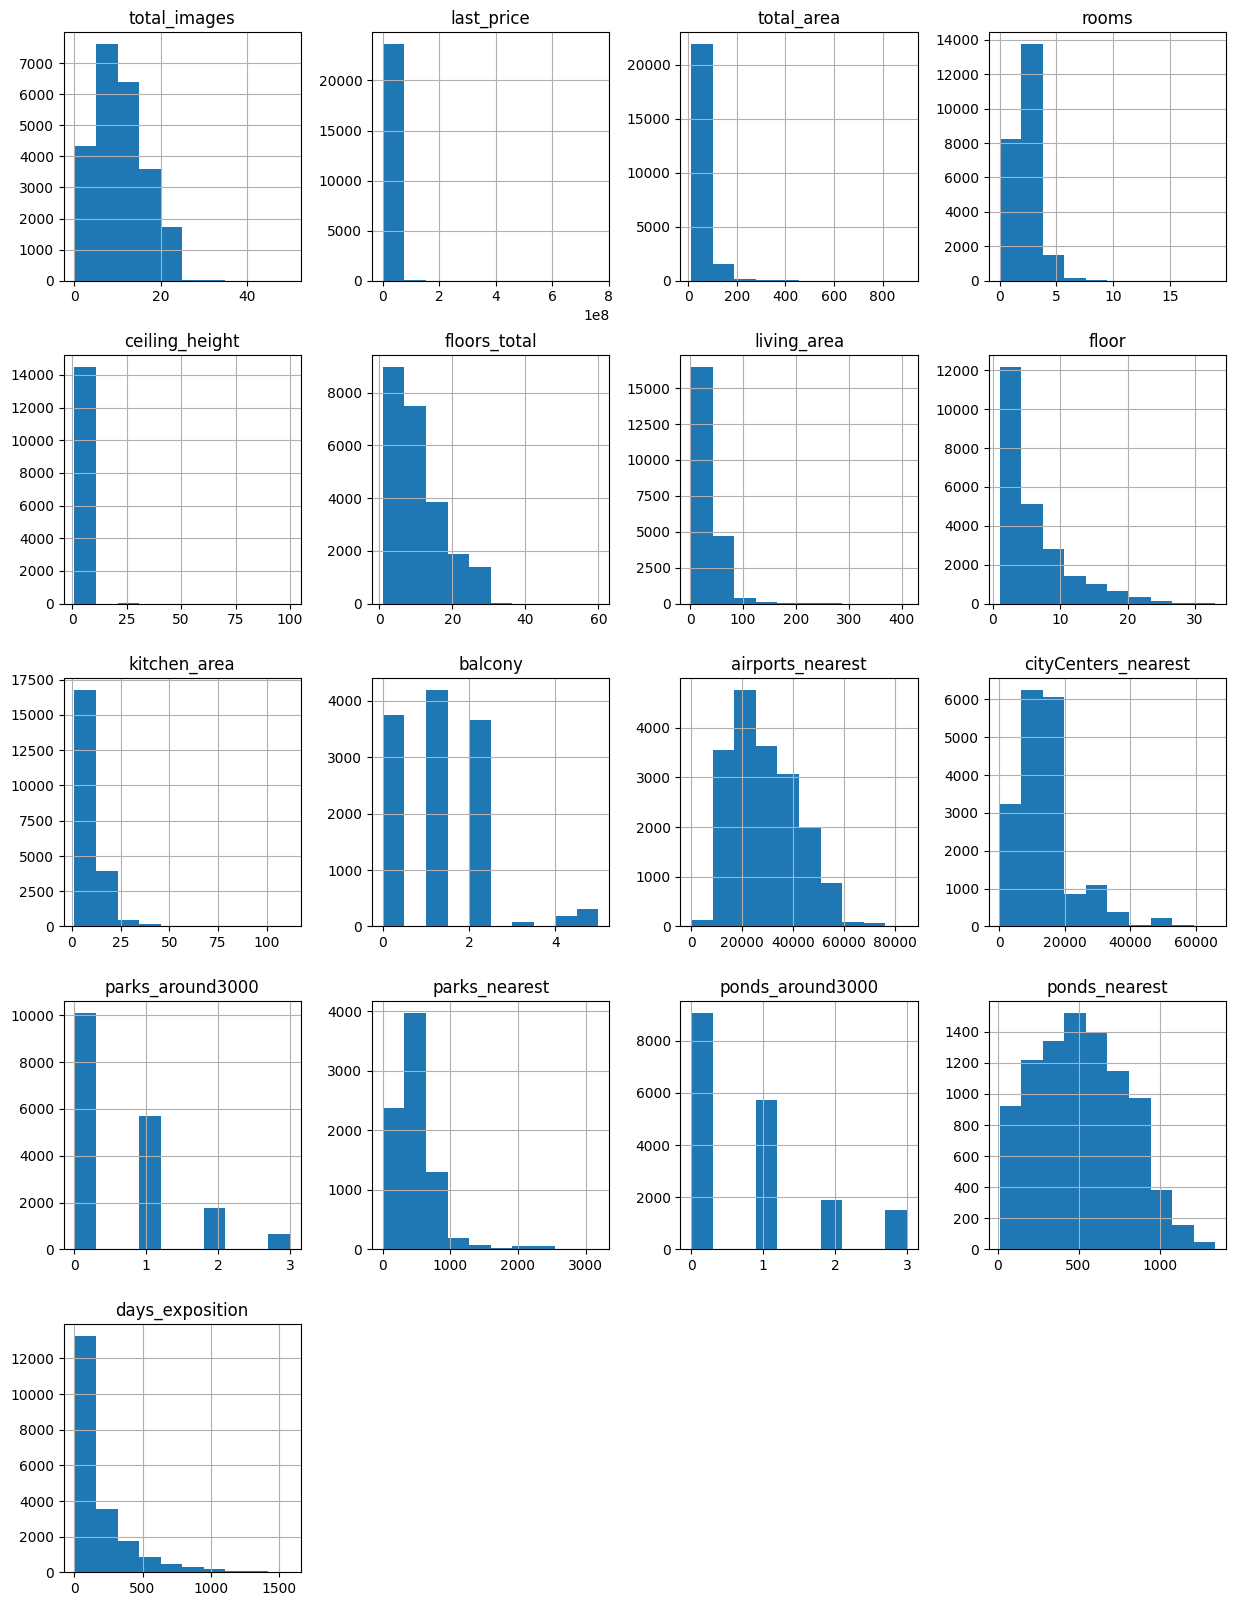

In [4]:
#построим гистограммы для всех числовых столбцов таблицы на 1 графике
data.hist(figsize=(15, 20))
None

**Вывод**: по основной информаци из датафрейма видно, что есть очень много пропущенных значений больше, чем в половине всех столбцов. Также в столбцах `first_day_exposition`, `is_apartment` неверно обозначены типы переменных. Судя по построенным графикам,  распределения значений в некоторых столбцах выглядят довольно неправдоподобно, например в столбцах `last_price`, `ceiling_height`. 

### Предобработка данных

In [5]:
#создадим копию исходного датафрейма для дальнейшего анализа
old_data = data.copy()

In [6]:
#проверим, есть ли в датафрейме явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет, идем дальше.

In [7]:
#выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Действительно довольно много столбцов имеют большое количество пропущенных значений. Попробуем их заполнить там, где это возможно. В столбце `locality_name` не много пропусков, по сравнению с количеством пропусков в других столбцах. Вероятно, возникла технологическая ошибка, поскольку эти данные были внесены не вручную. Удалим сначала неявные дубликаты этого столбца. Для этого сперва посмотрим его уникальные зачения. 

In [8]:
#выведем уникальные значения столбца locality_name, чтобы просмотреть данные и найти неявные дубликаты
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Неявные дубликаты есть: "посёлок городского типа", "посёлок", "городской посёлок". Преобразуем все эти дубликаты к 1 значению - "поселок".

In [9]:
#устраним неявные дубликаты
#произведем замену буквы "ё" на "е", а также замену непосредственно дубликатов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'посёлок городского типа', 'городской посёлок'], 'поселок', regex=True)
) 
data['locality_name'].value_counts()

Санкт-Петербург                               15721
поселок Мурино                                  556
поселок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
поселок Почап                                     1
поселок Калитино                                  1
деревня Новолисино                                1
поселок Левашово                                  1
поселок при железнодорожной станции Вещево        1
Name: locality_name, Length: 329, dtype: int64

После устранения неявных дубликатов видим, что на данный момент анализа данных больше всего квартир продают в Петербурге, поселке Мурино и поселке Шушары. Интересно, сохранится ли этот порядок после дальнейшей обработки данных.

Теперь в столбце `locality_name` заменим пропуски на 'unknown'.

In [10]:
data['locality_name'] = data['locality_name'].fillna('unknown')

#проверим получилось ли устранить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Неявные дубликаты устранены, пропуски заполнены, теперь со столбцом `locality_name` все в порядке. Идем дальше.

Заменим пропущенные значения в столбце balcony на 0, т.к. если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Здесь ошибка связана скорее всего с человеческим фактором.

In [11]:
#заполним пропуски и изменим также тип данных с float на int, т.к. балконы - целые значения
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int32

Отметим, что очень большое количество пропусков можно наблюдать в столбце `is_apartment`. Не совсем понятно, чем можно объяснить такое большое количество пропусков именно в этом столбце. Если посмотреть на основную информацию о датафрейме, то мы увидим, что данные это столбца относятся к классу *object*, что не верно. Поскольку данные этого столбца должны быть логическими переменными (булевыми), т.е. содержать значение True, если это квартира, и False, если это не так. 

In [12]:
#заменим тип данных в столбце is_apartment на логические значения
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].head(30)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25    False
26     True
27     True
28     True
29    False
Name: is_apartment, dtype: bool

После изменения типов данных столбца `is_apartment` пропуски исчезли. Вероятно, возникновение пропусков было связано с человеческим фактором, а именно на этапе записи данных.

В столбце `first_day_exposition` тип данных - object, а должен быть datatime поскольку для записи дат есть свой формат.

In [13]:
#заменим тип данных этого столбца на datatime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

После изменения типа данных столбца `first_day_exposition` осталась только дата. До обработки этого столбца время, которое там отображалось, исчезло .

В столбце `days_exposition` тип данных - float, а должно быть int, поскольку дни - целое значение. Помимо этого, в данном столбце присутствуют пропуски, которые можно заполнить значением 0, т.к. эти данные скорее всего вносились вручную, и тот, кто их вносил решил пропустить заполнение этого параметра, если по этой квартире не было размещено объявление.

In [14]:
#заменим пропуски на 0 и тип данных на int
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['days_exposition']

0          0
1         81
2        558
3        424
4        121
        ... 
23694      0
23695     45
23696      0
23697    602
23698      0
Name: days_exposition, Length: 23699, dtype: int32

В столбце `ceiling_height` содержится информация о высоте потолка (м). Посмотрим подробнее характеристики выборки.

In [15]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'График распределения значений высоты потолка'}, ylabel='Frequency'>

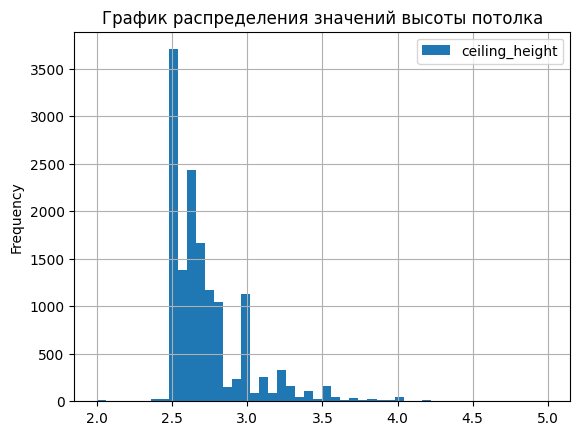

In [16]:
#построим гистограмму распределения значений, указав дипазон распределения значений, для большей наглядности
data.plot(title='График распределения значений высоты потолка', y='ceiling_height', kind='hist', range=(2,5), bins=50, grid=True)

В выборке минимальное и максимальное значение выглядит очень неправдоподобно. Выбросы очевидно есть, вернемся к этому столбцу позже, если его данные потребуются на этапе обработки данных.

Теперь обратимся к столбцу `balcony`. Из гистограммы распределения значений в столбце, что мы строили ранее, видно, что есть аномалии. Построим по этому столбцу "ящик с усами", чтобы убедиться, что это действительно выбросы.

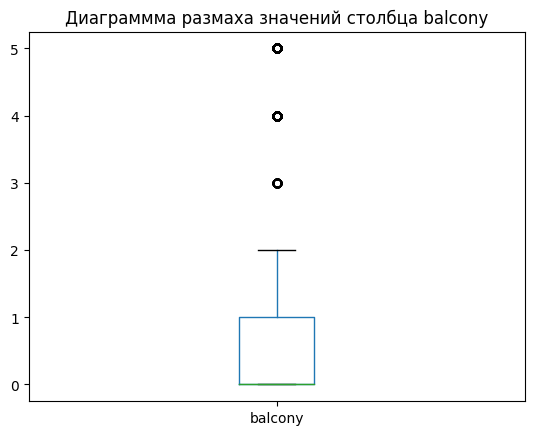

<Figure size 1000x600 with 0 Axes>

In [17]:
#построим "ящик с усами" для столбца balcony
data['balcony'].plot(title='Диаграммма размаха значений столбца balcony', kind='box')
plt.figure(figsize=(10,6))
plt.show()

Выбросы есть, это квартиры, в которых имеется 3, 4 и 5 балконов. Перезапишем датафрейм, устранив аномалию равную 5 для того, чтобы удаленных выбросов было не больше 10% от исходного датафрейма.

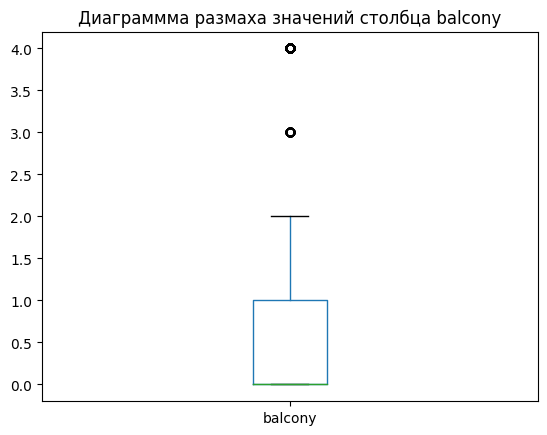

<Figure size 1000x600 with 0 Axes>

In [18]:
#удалим выбросы, задав условие, и перезапишем датафрейм
data = data[data['balcony'] <= 4]

#выведем "ящик с усами" для оценки выбросов еще раз
data['balcony'].plot(title='Диаграммма размаха значений столбца balcony', kind='box')
plt.figure(figsize=(10,6))
plt.show()

In [19]:
#посмотрим сколько данных осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23395 non-null  int64         
 1   last_price            23395 non-null  float64       
 2   total_area            23395 non-null  float64       
 3   first_day_exposition  23395 non-null  datetime64[ns]
 4   rooms                 23395 non-null  int64         
 5   ceiling_height        14273 non-null  float64       
 6   floors_total          23309 non-null  float64       
 7   living_area           21513 non-null  float64       
 8   floor                 23395 non-null  int64         
 9   is_apartment          23395 non-null  bool          
 10  studio                23395 non-null  bool          
 11  open_plan             23395 non-null  bool          
 12  kitchen_area          21124 non-null  float64       
 13  balcony         

In [20]:
#посчитаем долю оставшихся данных после удаления выбросов и сохраним в переменную new_data
new_data = len(data) / len(old_data)

print(f'После устранения выбросов от исходного датафрейма осталось {new_data:.1%} данных')

После устранения выбросов от исходного датафрейма осталось 98.7% данных


Доля устраненных выбросов составила 1.3 %, что не превышает норму. Оставим этот столбец теперь как есть.

In [21]:
#посчитаем количество пропусков еще раз
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9122
floors_total               86
living_area              1882
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2271
balcony                     0
locality_name               0
airports_nearest         5481
cityCenters_nearest      5458
parks_around3000         5457
parks_nearest           15419
ponds_around3000         5457
ponds_nearest           14391
days_exposition             0
dtype: int64

В некоторых столбцах удалось заполнить пропуски, изменить тип данных, а также устранить аномалии. Остальные столбцы пока оставим как есть.

### Добавим в таблицу новые столбцы

Добавим в исходную таблицу новые столбцы.

In [22]:
#создаем столбец price_for_m - цена одного квадратного метра;
data['price_for_m'] = data['last_price'] / data['total_area'] 

#округлим значения до двух знаков после запятой
data['price_for_m'] = round(data['price_for_m'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00


In [24]:
#создаем столбец weekday, в котором будет обозначен день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1


In [25]:
#создаем столбец month, в котором будет обозначен месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6


In [26]:
#создаем столбец year, в котором будет обозначен год публикации объявления;
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018


In [27]:
#чтобы создать столбец с параметром "тип этажа квартиры"
#создим функцию floor_type, в которой этажи квартиры будут распределены на категории («первый», «последний», «другой»)
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif floors_total > floor > 1:
        return 'другой'

In [28]:
#применяем функцию к новому столбу датафрейма floor_category
data['floor_category'] = data.apply(floor_type, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой


In [29]:
#перезапишем столбец cityCenters_nearest так, чтобы расстояние до центра города было в километрах 
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest'] = round(data['cityCenters_nearest'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16.03,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18.60,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13.93,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6.80,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8.10,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой


### Проведите исследовательский анализ данных

Чтобы найти редкие и выбивающиеся значения изучим подбробнее следующие параметры:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка.

count    23395.000000
mean        60.082418
std         35.542030
min         12.000000
25%         40.000000
50%         51.800000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

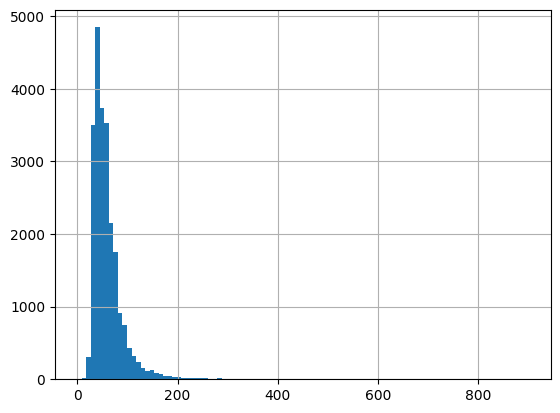

<Figure size 1000x600 with 0 Axes>

In [30]:
#изучим столбец total_area;
data['total_area'].hist(bins=100, range=(0, 900))
plt.figure(figsize=(10,6))
data['total_area'].describe()

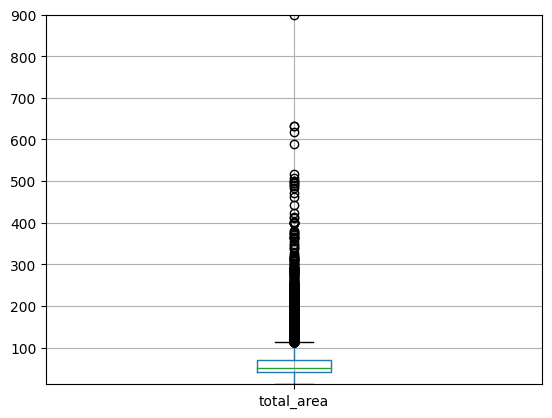

<Figure size 1000x600 with 0 Axes>

In [31]:
#построим "ящик с усами" для столбца total_area
plt.ylim(12, 900)
data.boxplot(column='total_area')

plt.figure(figsize=(10,6))
plt.show()

Среди значений определенно есть выбросы, об этом также свидетельствует "ящик с усами". Однако эти выбросы не сильно влияют на среднее (60 кв.м.), т.е. распределение в целом нормальное. Минимальное значение: 12 кв.м. Максимальное значение в 900 кв.м., вероятно, является просто выбросом. Оставим этот столбец как есть.

count    21513.000000
mean        34.322995
std         22.041654
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

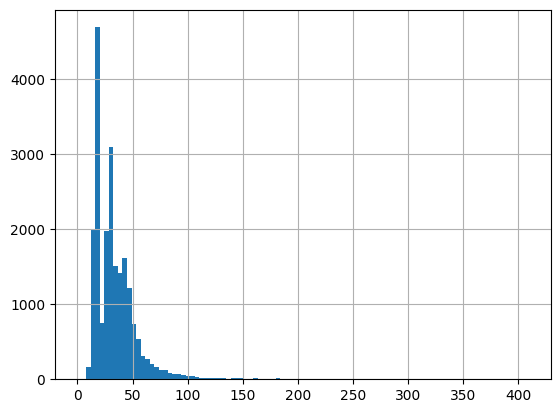

<Figure size 1000x600 with 0 Axes>

In [32]:
#изучим теперь столбец living_area;
data['living_area'].hist(bins=100, range=(0, 409))

plt.figure(figsize=(10,6))
data['living_area'].describe()

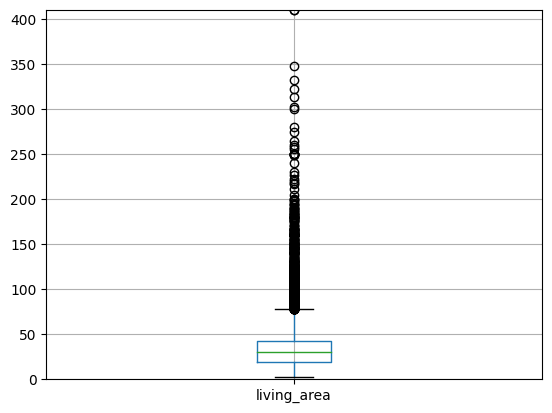

<Figure size 1000x600 with 0 Axes>

In [33]:
#построим диаграмму размаха значений столбца living_area, чтобы оценить разбросы
plt.ylim(0, 410)
data.boxplot(column='living_area')

plt.figure(figsize=(10,6))
plt.show()

Распределение в данном столбце не является нормальным. Здесь, похоже, есть зависимость наличия выбросов среди значений общей площади квартиры и ее жилой площади. Минимальное значение равно 2 (кв.м.), максимальное - 409 (кв.м.). Таким образом, минимальное значение получилось слишком маленьким, а максимальное, наоборот, слишком большим.

Предположим, что во всех квартирах, в которых жилая площадь больше 150 м на самом деле вещественные значения, т.е. 409 м - это на самом деле 40.9 м, например. Напишем функцию, которая вернет эти вещественные значения.

In [34]:
#применим к столбцу living_area функцию living_func, которая преобразует значения, которые больше 150 (м), в вещественные
def living_func(row):
    living_area = row['living_area']
    if living_area > 150:
        return living_area / 10
    else:
        return living_area
data['living_area'] = data.apply(living_func, axis=1)

count    21513.000000
mean        33.358042
std         18.144305
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

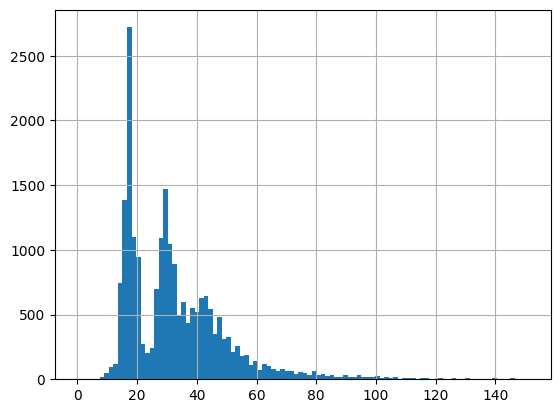

<Figure size 1000x600 with 0 Axes>

In [35]:
#посмотрим еще раз на распределение значений в столбце living_area после применения функции
data['living_area'].hist(bins=100, range=(0, 151))

plt.figure(figsize=(10,6))
data['living_area'].describe()

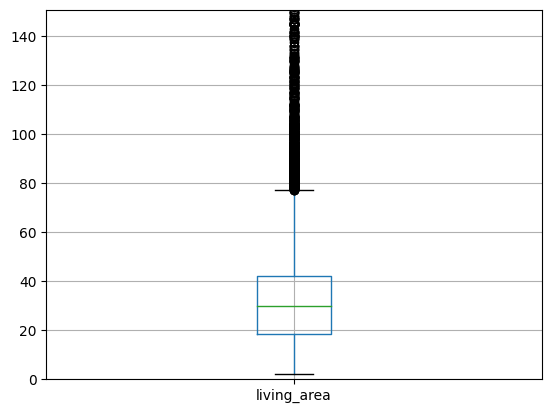

<Figure size 1000x600 with 0 Axes>

In [36]:
#построим еще раз диаграмму размаха значений столбца living_area, чтобы оценить разбросы
plt.ylim(0, 151)
data.boxplot(column='living_area')

plt.figure(figsize=(10,6))
plt.show()

Выбросов стало немного меньше, но они все еще есть. После применения функции значение среднего мало изменилось. Оставим этот столбец пока таким.

count    2.339500e+04
mean     6.511615e+06
std      1.090853e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64

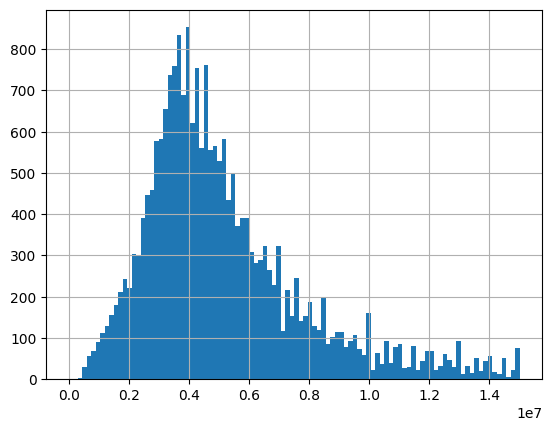

<Figure size 1000x600 with 0 Axes>

In [37]:
#изучим столбец last price
data['last_price'].hist(bins=100, range=(0, 15000000))

plt.figure(figsize=(10,6))
data['last_price'].describe()

Распределение значений в столбце last_price нормальное, оставим его как есть.

count    23395.000000
mean         2.062492
std          1.078453
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

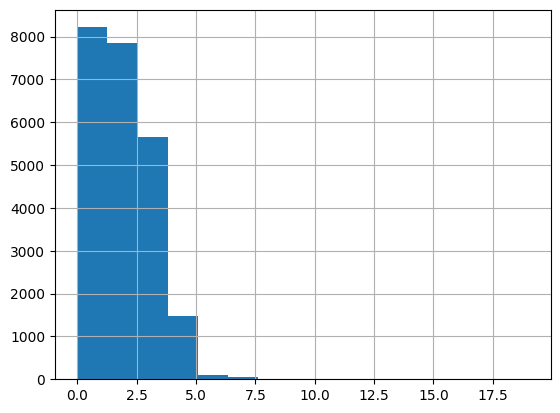

<Figure size 1000x600 with 0 Axes>

In [38]:
#изучим столбец rooms;
data['rooms'].hist(bins=15, range=(0, 19))

plt.figure(figsize=(10,6))
data['rooms'].describe()

Как оказалось, минимальное количество комнат в квартире равно 0, а максимальное - 19. Удалим аномальные значения из этого столбца.

count    23110.000000
mean         2.057248
std          0.993101
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

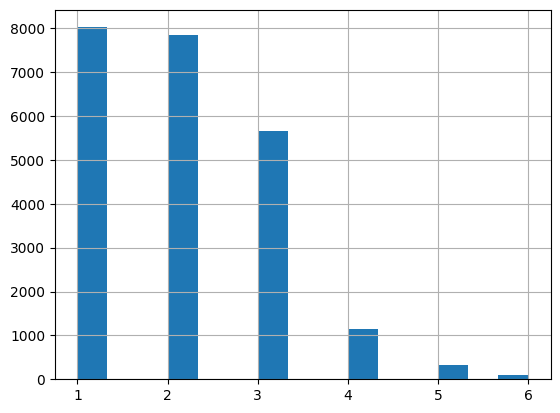

<Figure size 1000x600 with 0 Axes>

In [39]:
#удалим аномальные значения столбца и перезапишем датафрейм
data = data[(data['rooms'] > 0) & (data['rooms'] <= 6)]

#построим график распределения значений столбца rooms еще раз
data['rooms'].hist(bins=15, range=(1, 6))

plt.figure(figsize=(10,6))
data['rooms'].describe()

Теперь с данными все в порядке. Большим спросом пользуются квартиры с 1 или 2-мя комнатами.

count    14128.000000
mean         2.757997
std          0.924955
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

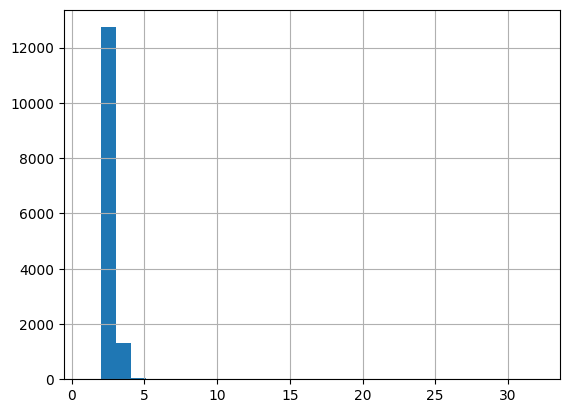

<Figure size 1000x600 with 0 Axes>

In [40]:
#изучим столбец ceiling_height;
data['ceiling_height'].hist(bins=30, range=(1, 32))
plt.figure(figsize=(10,6))
data['ceiling_height'].describe()

Минимальная высота потолка оказалась слишком маленькой (1 м), а максимальная слишком большой (32 м). Предположим, что такие значения, как 32 м, 27 м на самом деле являются вещественными, то есть 3.2 м и 2.7 м. Значения меньше 2.4 удалим.

In [41]:
#применим к столбцу ceiling_height функцию ceiling_func, которая преобразует значения больше 10 (м), в вещественные
def ceiling_func(row):
    ceiling_height = row['ceiling_height']
    if ceiling_height > 10:
        return ceiling_height / 10
    else:
        return ceiling_height
data['ceiling_height'] = data.apply(ceiling_func, axis=1)

count    13997.000000
mean         2.715885
std          0.246721
min          2.450000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.980000
Name: ceiling_height, dtype: float64

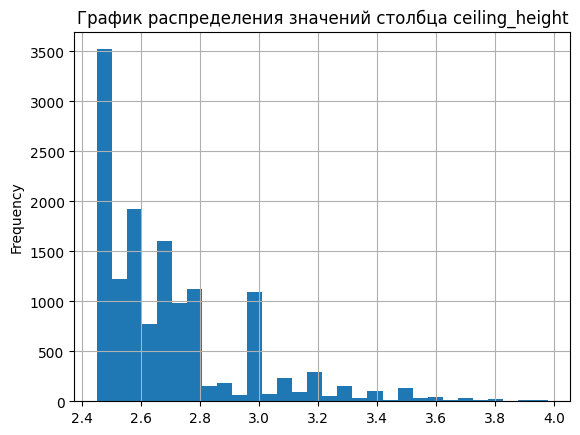

<Figure size 1000x600 with 0 Axes>

In [42]:
#удалим значения меньше 2.4  и больше 4 м (стандратный минимум и максимум для высоты потолка в квартире)
data = data[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 4)]

#посмотрим на график распределения значений еще раз
data['ceiling_height'].plot(title='График распределения значений столбца ceiling_height', kind='hist', bins=30, grid=True)
plt.figure(figsize=(10,6))
data['ceiling_height'].describe()

Теперь данные выглядят более правдоподобно. В датафрейме вошло больше всего квартир, у которых высота потолка 2.4 метра, что является средней высотой потолка в квартире (на основе данной статьи: https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=%D0%92%20%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B0%D1%85%20%D0%BE%D0%B1%D1%8B%D1%87%D0%BD%D0%BE%20%D1%8D%D1%82%D0%BE%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5,%D0%BA%D0%BE%D1%82%D0%BE%D1%80%D1%8B%D0%B5%20%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%8F%D1%82%D1%81%D1%8F%20%D0%BA%20%D1%81%D1%82%D0%B0%D0%BB%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D1%83%20%D0%B0%D0%BC%D0%BF%D0%B8%D1%80%D1%83.)

count      13988
unique         3
top       другой
freq       10213
Name: floor_category, dtype: object

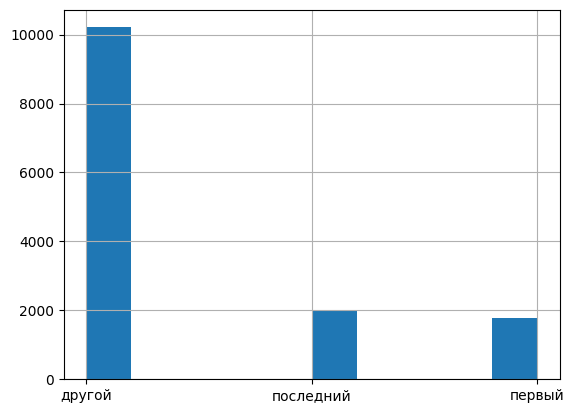

<Figure size 1000x600 with 0 Axes>

In [43]:
#изучим столбец floor_category;
data['floor_category'].hist(bins=10, grid=True)
plt.figure(figsize=(10,6))
data['floor_category'].describe()

С данными все в порядке, вполне логично, что квартир, расположенных на первом и последнем этаже, будет меньше по сравнению с квартирами, расположенными на других этажах.

count    13988.000000
mean        10.144552
std          6.168922
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

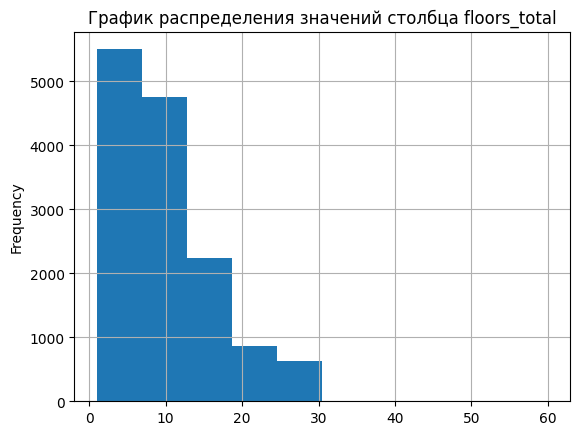

<Figure size 1000x600 with 0 Axes>

In [44]:
#изучим столбец floors_total;
data['floors_total'].plot(title='График распределения значений столбца floors_total', kind='hist', bins=10, grid=True)
plt.figure(figsize=(10,6))
data['floors_total'].describe()

In [45]:
#посмотрим подробнее уникальные значения столбца floors_total, чтобы оценить, есть ли аномалии
data['floors_total'].value_counts()

5.0     3571
9.0     2501
12.0     833
16.0     827
4.0      746
10.0     726
6.0      583
25.0     495
17.0     476
3.0      382
7.0      378
14.0     332
18.0     265
15.0     215
24.0     210
8.0      210
2.0      207
23.0     192
20.0     141
22.0     136
19.0     127
13.0     116
11.0     107
27.0      71
21.0      61
26.0      51
1.0        9
28.0       9
35.0       6
36.0       1
52.0       1
29.0       1
34.0       1
60.0       1
Name: floors_total, dtype: int64

Среди данных, содержащих информацию о количестве этажей в доме, присутствуют выбросы равные 1, 52 и 60. Удалим их.

count    13977.000000
mean        10.143879
std          6.142354
min          2.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         36.000000
Name: floors_total, dtype: float64

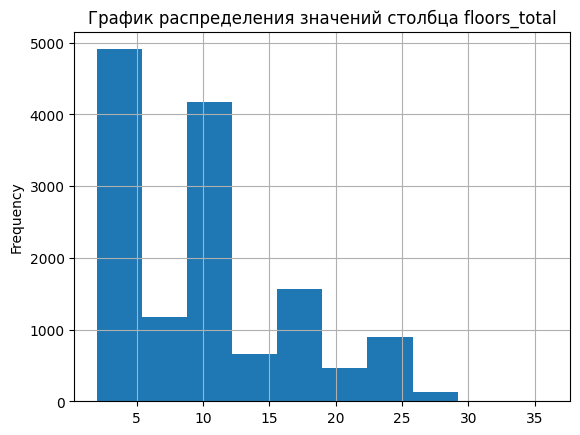

<Figure size 1000x600 with 0 Axes>

In [46]:
data = data[(data['floors_total'] != 60) & (data['floors_total'] != 52) & (data['floors_total'] != 1)]

#выведем график распределения значений столбца floors_total еще раз
data['floors_total'].plot(title='График распределения значений столбца floors_total', kind='hist', bins=10, grid=True)
plt.figure(figsize=(10,6))
data['floors_total'].describe()

In [47]:
#посмотрим еще раз уникальные значения столбца floors_total
data['floors_total'].value_counts()

5.0     3571
9.0     2501
12.0     833
16.0     827
4.0      746
10.0     726
6.0      583
25.0     495
17.0     476
3.0      382
7.0      378
14.0     332
18.0     265
15.0     215
24.0     210
8.0      210
2.0      207
23.0     192
20.0     141
22.0     136
19.0     127
13.0     116
11.0     107
27.0      71
21.0      61
26.0      51
28.0       9
35.0       6
36.0       1
29.0       1
34.0       1
Name: floors_total, dtype: int64

Теперь с данными все в порядке. Как оказалось, в датафрем вошло больше квартир, расположенных в 5-этажных домах.

count    11146.000000
mean        14.139352
std          8.768717
min          0.180000
25%          9.180000
50%         12.995000
75%         16.070000
max         65.970000
Name: cityCenters_nearest, dtype: float64

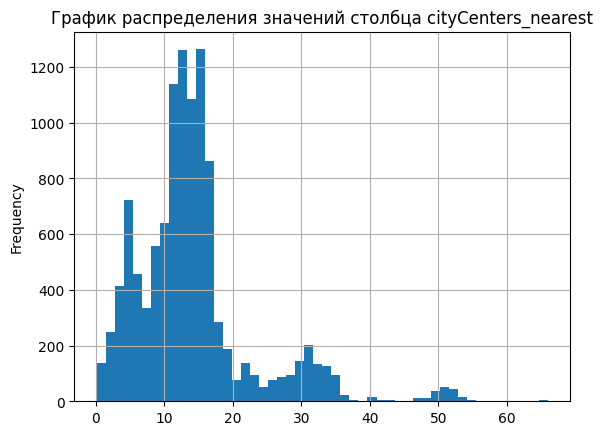

<Figure size 1000x600 with 0 Axes>

In [48]:
#изучим столбец cityCenters_nearest;
data['cityCenters_nearest'].plot(title='График распределения значений столбца cityCenters_nearest', kind='hist', bins=50, grid=True)
plt.figure(figsize=(10,6))
data['cityCenters_nearest'].describe()

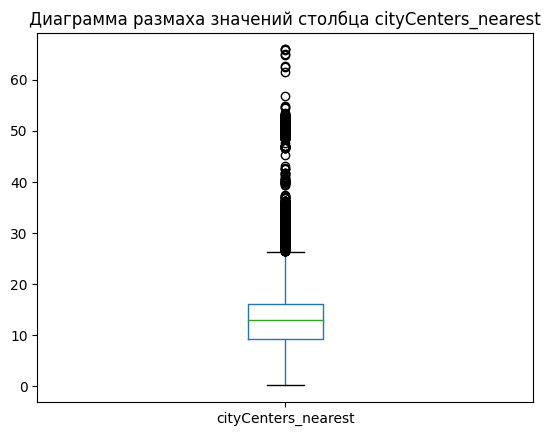

<Figure size 1000x600 with 0 Axes>

In [49]:
#посмотрим диаграмму рамзмаха значений столбца cityCenters_nearest
data['cityCenters_nearest'].plot(title='Диаграмма размаха значений столбца cityCenters_nearest', kind='box')
plt.figure(figsize=(10,6))
plt.show()

Распределение значений нормальное, выбросы есть, но они не сильно искажают картину, оставим этот столбец как есть. 

count    5085.000000
mean      477.095772
std       322.359350
min         3.000000
25%       284.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

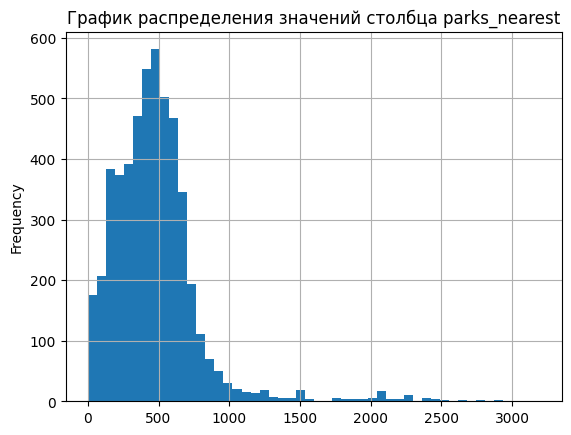

<Figure size 1000x600 with 0 Axes>

In [50]:
#изучим столбец parks_nearest
data['parks_nearest'].plot(title='График распределения значений столбца parks_nearest', kind='hist', grid=True, bins=50)
plt.figure(figsize=(10,6))
data['parks_nearest'].describe()

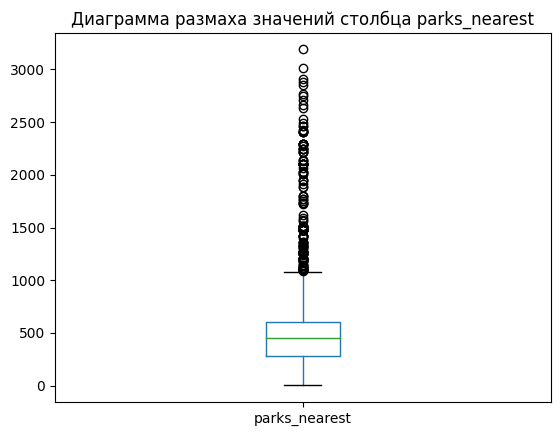

<Figure size 1000x600 with 0 Axes>

In [51]:
#посмотрим диаграмму рамзмаха значений столбца parks_nearest
data['parks_nearest'].plot(title='Диаграмма размаха значений столбца parks_nearest', kind='box')
plt.figure(figsize=(10,6))
plt.show()

В этом столбце  распределение значений тоже нормальное, выбросы есть, но они не сильно влияют на остальные показатели, оставим тоже этот столбец как есть.

Изучим теперь как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.


count    13986.000000
mean       158.242314
std        220.209208
min          0.000000
25%         17.000000
50%         72.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

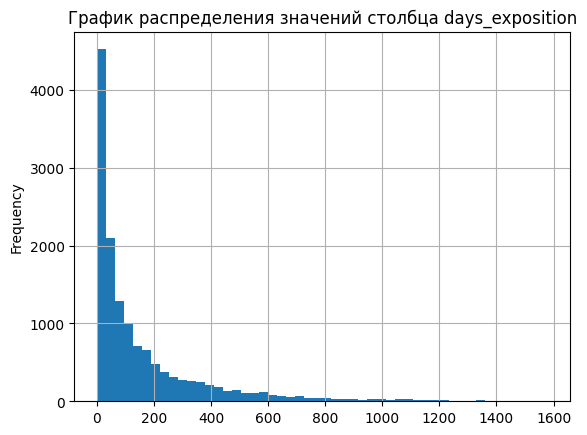

<Figure size 1000x600 with 0 Axes>

In [52]:
#построим гистограмму столбца days_exposition и выведем основную информацию по столбцу
data['days_exposition'].plot(title='График распределения значений столбца days_exposition', kind='hist', grid=True, bins=50)
plt.figure(figsize=(10,6))
data['days_exposition'].describe() 

In [53]:
#посчитаем медиану столбца days_exposition
data['days_exposition'].median()

72.0

Обычно продажа занимала около 72 дней, т.е. около 2-х месяцев. Быстрыми можно считать продажи, которые были совершены без размещения объявления о продаже квартиры. Необычно долгими же являются те продажи, которые произошли более, чем через 600 дней со дня размещения объявления о продаже квартиры, т.е. когда прошло более 1,5 лет.

Теперь изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.
Проверим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

In [54]:
#вычислим, есть ли зависимость цены квартиры от ее общей площади (коэф. корр. Пирсона)
data['last_price'].corr(data['total_area'])

0.6682592357324901

<AxesSubplot:title={'center':'График зависимости цены квартиры от ее общей площади'}, xlabel='total_area', ylabel='last_price'>

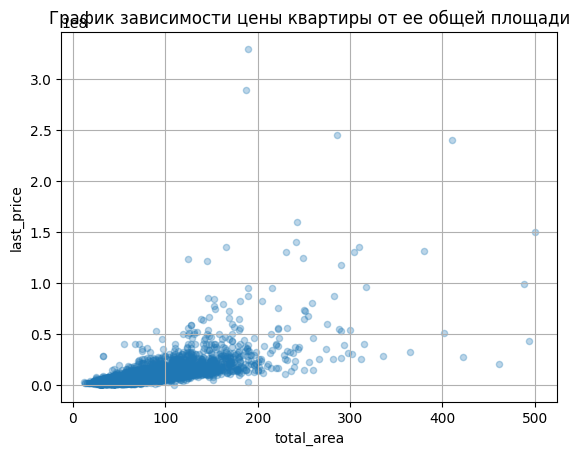

In [55]:
#построим график распределения значений по точкам
data.plot(title='График зависимости цены квартиры от ее общей площади', x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3)

**Вывод**: Есть прямая связь, но она средняя. Можно говорить о том, что есть зависимость между стоимостью квартиры и ее общей площадью, что вполне логично. Чем выше стоимость квартиры, тем больше ее общая площадь.

In [56]:
#вычислим, есть ли зависимость цены квартиры от ее жилой площади (коэф. корр. Пирсона)
data['last_price'].corr(data['living_area'])

0.4530601383839478

<AxesSubplot:title={'center':'График зависимости цены квартиры от ее жилой площади'}, xlabel='living_area', ylabel='last_price'>

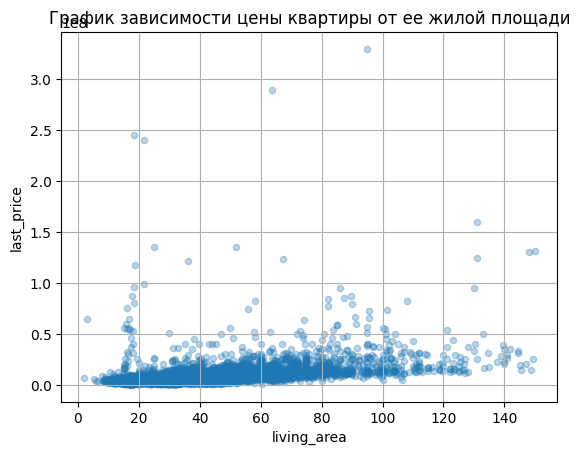

In [57]:
#построим график распределения значений по точкам
data.plot(title='График зависимости цены квартиры от ее жилой площади', x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.3)

**Вывод**: Есть довольно слабая прямая связь. В целом можно утверждать, что есть слабая зависимость стоимости квартиры от ее жилой площади. Как и в случае с общей площадью, чем выше стоимость квартиры, тем больше ее жилая площадь.

In [58]:
#вычислим, есть ли зависимость цены квартиры от площади ее кухни (коэф. корр. Пирсона)
data['last_price'].corr(data['kitchen_area'])

0.5017250178737709

<AxesSubplot:title={'center':'График зависимости цены квартиры от площади ее кухни'}, xlabel='kitchen_area', ylabel='last_price'>

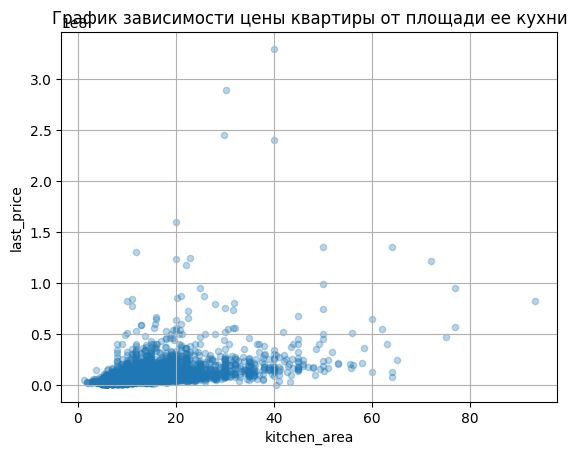

In [59]:
#построим график распределения значений по точкам
data.plot(title='График зависимости цены квартиры от площади ее кухни', x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.3)

**Вывод**: Есть средняя прямая связь. Наблюдается зависимость стоимости квартиры от площади ее кухни, т.е. чем выше стоимость квартиры, тем больше площадь ее кухни.

In [60]:
#вычислим, есть ли зависимость цены квартиры от количества комнат в ней (коэф. корр. Пирсона)
data['last_price'].corr(data['rooms'])

0.3692601874078907

<AxesSubplot:title={'center':'График зависимости цены квартиры от количества комнат в ней'}, xlabel='rooms', ylabel='last_price'>

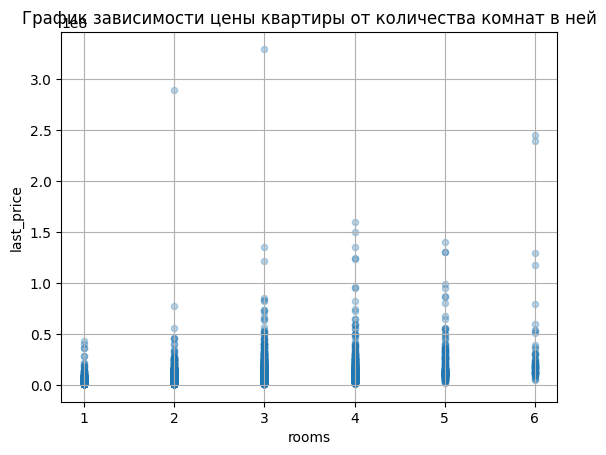

In [61]:
#построим график распределения значений по точкам
data.plot(title='График зависимости цены квартиры от количества комнат в ней', x='rooms', y='last_price', kind='scatter', grid=True, alpha=0.3)

**Вывод**: Есть довольно слабая прямая связь. Соттветственно, есть слабая зависимость между стоимостью квартиры и количества комнат в ней. Чем выше стоимость квартиры, тем больше в ней комнат. Стоимость однокомнатной квартиры значимо меньше, чем четырехкомнатной, но в то же время некоторые шестикомнатные квартиры стоили дешевле четырехкомнатной, поэтому зависимость слабая.

In [62]:
#вычислим, есть ли зависимость цены квартиры от этажа, на котором она расположена 
#для удобства поделим значения столбца last_price на 1000000 и затем построим сводную таблицу
data['last_price'] = data['last_price'] / 10000000
data_pivot = data.pivot_table(index='floor_category', values='last_price', aggfunc={'count','mean'})

#выводим полученную таблицу
data_pivot 

,count,mean
floor_category,,
другой,10211,0.679955
первый,1763,0.491117
последний,2003,0.668296


<AxesSubplot:xlabel='floor_category'>

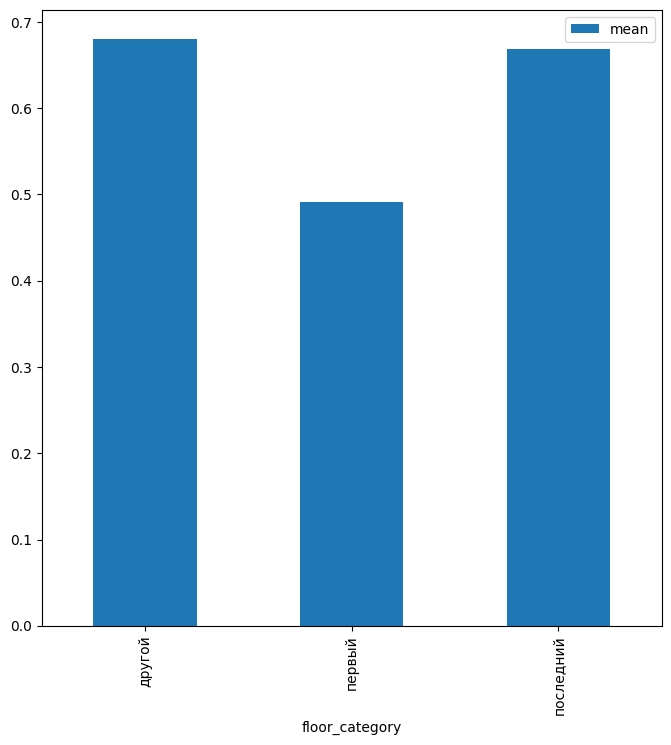

In [63]:
#построим столбчатую диаграмму значений mean
data_pivot.plot(kind='bar', y='mean', figsize=(8, 8))

**Вывод**: На основе полученного графика, можно сказать, что цены на последний и другие этажи выше, чем на первый этаж. Видимо, квартиры на первом этаже пользуются меньшим спросом среди покупателей и как следствие стоят дешевле.

In [64]:
#вычислим, есть ли зависимость цены квартиры от даты размещения объявления о продаже (день недели, месяц, год) 
#построим сводную таблицу, отражающую зависимость цены квартиры от дня недели, в который было размещено объявление о продаже
data_pivot = data.pivot_table(index='weekday', values='last_price', aggfunc={'count','mean'})

#выводим полученную таблицу
data_pivot 

,count,mean
weekday,,
0,2281,0.647878
1,2548,0.673642
2,2324,0.650341
3,2539,0.670512
4,2221,0.660836
5,1123,0.608950
6,950,0.627862


<AxesSubplot:xlabel='weekday'>

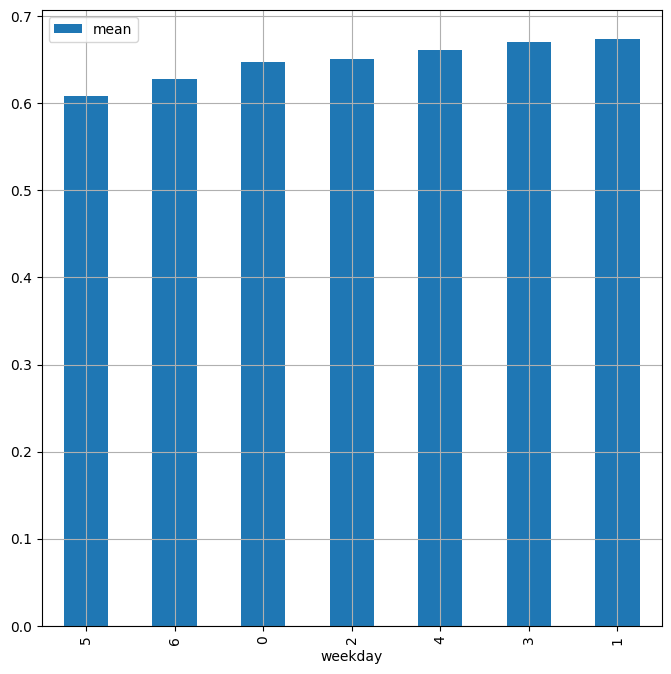

In [65]:
#построим столбчатую диаграмму значений mean
data_pivot.sort_values(by='mean').plot(kind='bar', y='mean', figsize=(8, 8), grid=True)

**Вывод**: Цена объекта не сильно зависит от того, в какой день недели было размещено объявление о его продаже.

In [66]:
#вычислим, есть ли зависимость цены квартиры от даты размещения (день недели, месяц, год) 
#построим сводную таблицу, отражающую зависимость цены квартиры от месяца, в который было размещено объявление о продаже
data_pivot = data.pivot_table(index='month', values='last_price', aggfunc={'count','mean'})

#выводим полученную таблицу
data_pivot 

,count,mean
month,,
1,891,0.674581
2,1640,0.658951
3,1678,0.623427
4,1425,0.696151
5,677,0.677571
6,881,0.608531
7,1013,0.675562
8,1053,0.666021
9,1180,0.672419


<AxesSubplot:xlabel='month'>

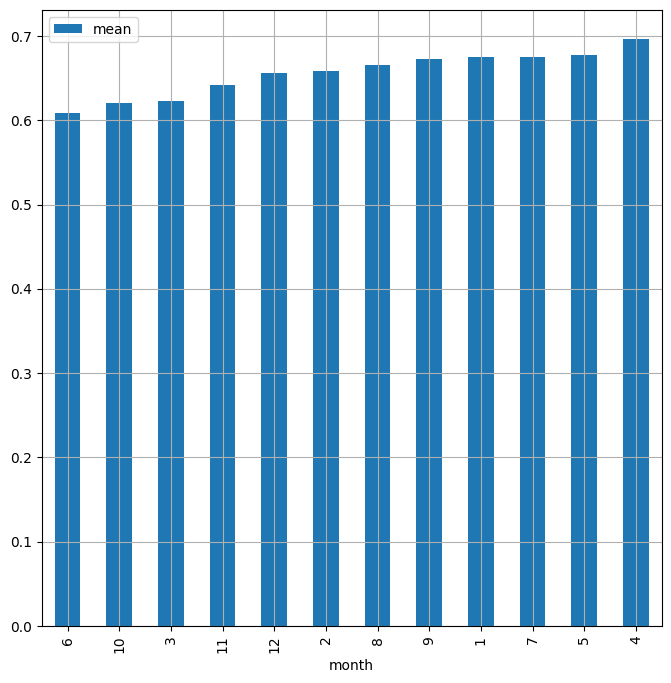

In [67]:
#построим столбчатую диаграмму значений mean
data_pivot.sort_values(by='mean').plot(kind='bar', y='mean', figsize=(8, 8), grid=True)

**Вывод**: Зависимость прослеживается. Цены были выше на те квартиры, на которые объявление о продаже были размещены  в апреле, а ниже всего на те, что были опубликованы в июне и октябре.

In [68]:
#вычислим, есть ли зависимость цены квартиры от даты размещения (день недели, месяц, год) 
#построим сводную таблицу, отражающую зависимость цены квартиры от года, в который было размещено объявление о продаже
data_pivot = data.pivot_table(index='year', values='last_price', aggfunc={'count','mean'})

#выводим полученную таблицу
data_pivot 

,count,mean
year,,
2014,73,1.158177
2015,592,0.915769
2016,1332,0.686180
2017,4272,0.660454
2018,5588,0.599029
2019,2129,0.679474


<AxesSubplot:xlabel='year'>

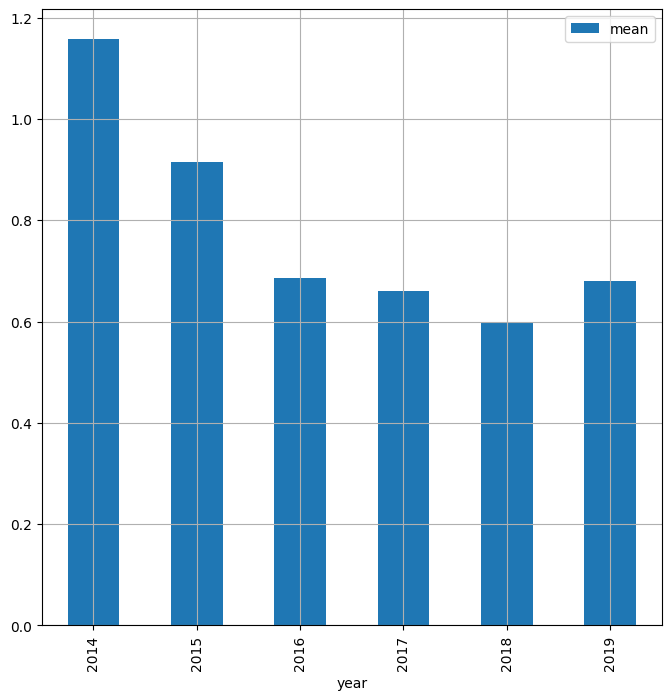

In [69]:
#построим столбчатую диаграмму значений mean
data_pivot.plot(kind='bar', y='mean', figsize=(8, 8), grid=True)

**Вывод**: Зависимость явно прослеживается. Можно наблюдать постепенный спад цен на те квартиры, чьи объявления о продаже были опубликованы в период с 2014 по 2018 , но в 2019 ситуация изменилась и цены начали расти.

Таким образом, больше всего на общую стоимость объекта влияют факторы: общая площадь, этаж, на котором расположен объект; месяц и год размещения объявления о продаже объекта.

Посчитаем теперь среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [70]:
#Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для населенных пунктов. 

data_pivot = data.pivot_table(index='locality_name', values='price_for_m', aggfunc={'count', 'mean'})

data_pivot.columns = ['count', 'mean']

#сортируем сводную таблицу по убыванию и выводим 10 населенных пунктов с наибольшим числом объявлений
data_pivot = data_pivot.sort_values(by='count', ascending=False).head(10)
data_pivot

,count,mean
locality_name,,
Санкт-Петербург,9726,114968.331765
Всеволожск,257,67140.887938
Пушкин,229,103414.456201
поселок Шушары,213,79800.399343
поселок Мурино,204,86911.554118
Колпино,197,75821.995838
Гатчина,145,70015.076207
Петергоф,143,84965.708811
поселок Парголово,137,90901.350730


<AxesSubplot:xlabel='locality_name'>

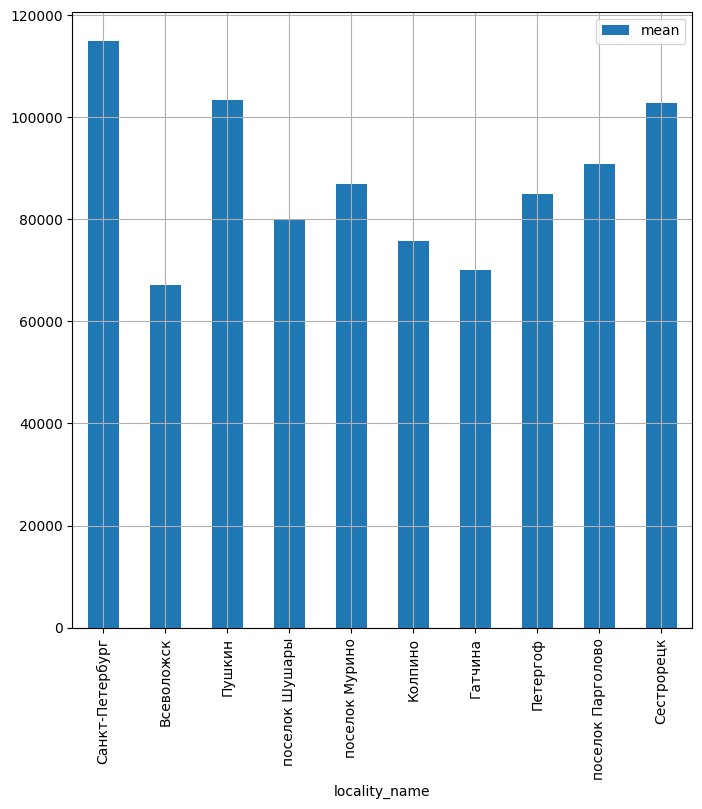

In [71]:
#для наглядности построим гистограмму по полученной сводной таблице
data_pivot.plot(kind='bar', y='mean', figsize=(8, 8), grid=True)

In [72]:
#Выделим населённые пункты с самой высокой и самой низкой стоимостью квадратного метра.
print(data_pivot['mean'].max())
print(data_pivot['mean'].min())

114968.33176537107
67140.88793774319


**Вывод**: Населенный пункт с самой низкой стоимостью квадратного метра за квартиру - Всеволожск, хотя этот город занимает второе место по количеству объявлений о продаже квартир. Первое же место по кол-ву объявлений о продажах объектов занимает Санкт-Петербург, у него же и самая высокая стоимость кв. метра за квартиру, что вполне очевидно, т.к. это мегаполис.

Теперь построим график изменения средней цены квартиры Петербурга для каждого километра от центра города.

In [73]:
#для удобства округлим значения данных о расстоянии до центра города так, чтобы было 0 км, 1 км, 2 км и т.д.
data['cityCenters_nearest'] = round(data['cityCenters_nearest'], 0)

#сделаем срез данных, в котором будут содержаться квартиры, расположенные в Санкт-Петебурге
#вычислим среднюю цену каждого километра от центра, построив сводную таблицу по получившемуся срезу данных
peterburg_apartment = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest', values='price_for_m', aggfunc={'price_for_m':'mean'})
peterburg_apartment


,price_for_m
cityCenters_nearest,
0.0,198640.582667
1.0,183108.745250
2.0,157452.832206
3.0,118883.448705
4.0,131051.879703
5.0,138653.722444
6.0,148004.718842
7.0,157086.449961
8.0,126057.762219


<Figure size 1000x600 with 0 Axes>

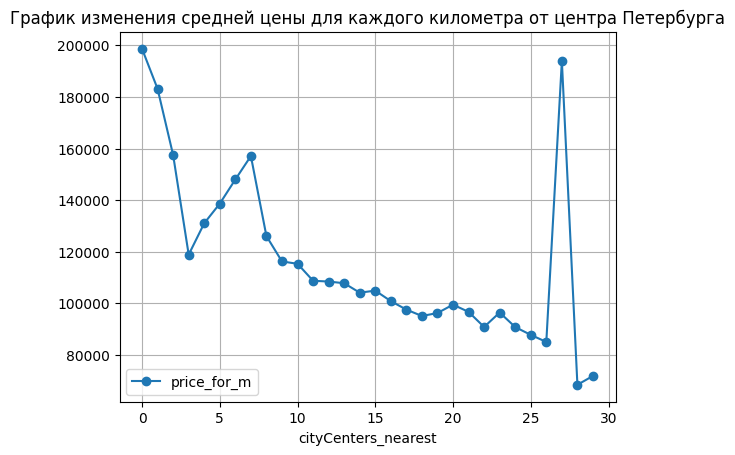

<Figure size 1000x600 with 0 Axes>

In [74]:
peterburg_apartment.plot(title='График изменения средней цены для каждого километра от центра Петербурга', y='price_for_m', style='o-', grid=True)
plt.figure(figsize=(10,6))

**Вывод**: Прослеживается зависимость между ценой квартиры за квадратный метр и ее расстоянием от центра Петербурга. Как и ожидалось, квартиры, расположенные ближе к центру Петербурга стоят дороже тех, что расположены дальше от центра. Хотя есть и аномалии. Так, например, средняя цена на квартиры, расположенные на расстоянии примерно 27 км, практически равна средней цене квартир в самом центре города.

### Общий вывод

В рамках данного исследования, были проанализированы данные csv таблицы, содержащей архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

**Цель исследования**: изучить параметры, влияющие на цену объектов.
 
#### Этап 1. Изучение и предварительная обработка данных

На этапе предобработки были произведены: 
- заполнение пропущенных значений в столбцах там, где это было возможно;
- изменение типов данных и обработка неявных дубликатов; 
- обработка аномальных значений; 
- добавление новых столбцов в исходный датафрейм для дальнейшего удобства при анализе данных


Итог:
1. По основной информации из исходного датафрейма оказалось, что в данных есть очень много пропущенных значений больше, чем в половине всех столбцов. Также в некоторых столбцах были неверно обозначены типы переменных. После построения графиков распределения значений обнаружилось, что в некоторых столбцах данные выглядят довольно неправдоподобно.

2. Пропуски были заполнены там, где это было возможно. Так, например, в столбце `locality_name` пропущенные значения были заменены на *unknown*. В этом же столбце были обнаружены неявные дубликаты: "посёлок городского типа", "посёлок", "городской посёлок". Все эти дубликаты были приведены к 1 значению - "поселок".


* В столбце `balcony` пропущенные значения были заменены на 0, т.к. если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Ошибка связана скорее всего с человеческим фактором.

3. Очень большое количество пропусков оказалось в столбце `is_apartment`. Не совсем понятно, чем можно объяснить такое большое количество пропусков именно в этом столбце. При подробном изучении данных этого столбца оказалось, что тип данных указан неверно. После изменения типа данных пропуски исчезли. Вероятно,их возникновение было связано с человеческим фактором, а именно на этапе записи данных.

* После изменения типа данных столбца `first_day_exposition` осталась только дата. Время, которое отображалось в столбце до его обработки, исчезло .

* В столбце `days_exposition` был изменен тип данных, а пропуски были заполнены значением 0, т.к. эти данные скорее всего вносились вручную, и тот, кто их вносил решил пропустить заполнение этого параметра, если по этой квартире не было размещено объявление.


4. Были обнаружены выбросы в столбце `balcony`, это квартиры, в которых имеется 3, 4 и 5 балконов.  Была устранена только аномалия равная 5 для того, чтобы удаленных выбросов оказалось не больше 10% от исходного датафрейма. Доля устраненных выбросов составила 1.3 %, что не превышает норму.

В результате в некоторых столбцах удалось заполнить пропуски, изменить тип данных, а также устранить аномалии. Остальные столбцы было решено оставить как есть.


Также для удобства дальнейшей обработки данных в исходный датафрейм были добавлены столбцы, содержащие параметры:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

#### Этап 2. Исследовательский анализ данных

Распределение значений по столбцу `total_area` в целом оказалось нормальным, средняя площадь квартиры составила 60 кв.м. Минимальное значение: 12 кв.м. Максимальное значение в 900 кв.м., вероятно, является просто выбросом. 


Распределение в столбце `living_area` не является нормальным. Есть предположение, существует зависимость наличия выбросов среди значений общей площади квартиры и ее жилой площади. Минимальное значение равно 2 (кв.м.), максимальное - 409 (кв.м.).
Возникло предположение, что во всех квартирах, в которых жилая площадь больше 150 м на самом деле вещественные значения, т.е. 409 м - это на самом деле 40.9 м, например. В ходе обработки данных этого столбца эти вещественные значения были возвращены. Таким образом, максимальная жилая площадь квартиры стала равняться 150 кв.м.


В ходе анализа данных оказалось, что минимальное *количество комнат* в квартире равно 0, а максимальное - 19 (аномалия). После удаления аномалий максимальное кол-во комнат стало 6, минимальное - 1. Отметим, что большим спросом пользуются квартиры с 1 или 2-мя комнатами.

В исходных данных минимальная *высота потолка* оказалась слишком маленькой (1 м), а максимальная слишком большой (32 м). Здесь так же возникло предположение, что во всех квартирах, в которых высота потолка равняется 32 м, 27 м, значения высоты должны быть вещественными, то есть 3.2 м и 2.7 м. Значения меньше 2.4 были удалены, т.к. это минимально допустимая высота квартиры. Интересно, что датафрейм вошло больше всего квартир, у которых высота потолка составляет как раз 2.4 метра.

Отметим, что квартир, расположенных на первом и последнем *этаже*, меньше по сравнению с количеством квартир, расположенных на других этажах.

Среди данных, содержащих информацию о *количестве этажей в доме*, были обнаружены выбросы равные 1, 52 и 60. Они были удалены. Как оказалось, в датафрем вошло больше квартир, расположенных в 5-этажных домах.

По результатам анализа было обнаружено, что продажа квартир занимала около 72 дней, т.е. около 2-х месяцев. Быстрыми можно считать продажи, которые были совершены без размещения объявления о продаже квартиры. Необычно долгими же являются те продажи, которые произошли более, чем через 600 дней со дня размещения объявления о продаже квартиры, т.е. когда прошло более 1,5 лет.

Первое место по кол-ву объявлений о продажах объектов занимает Санкт-Петербург, у него же и самая высокая стоимость кв. метра за квартиру, что вполне очевидно, т.к. это мегаполис. Населенный пункт с самой низкой же стоимостью квадратного метра за квартиру - Всеволожск, хотя этот город занимает второе место по количеству объявлений о продаже квартир. 



Подытоживая все описанные выше итоги, в ходе исследовательского анализа данных, были установлены следующие параметры, влияющие на цену объектов: 
* **Общая площадь объекта;** 

Есть зависимость между стоимостью квартиры и ее общей площадью, что вполне логично. Так, чем выше стоимость квартиры, тем больше ее общая площадь.

* **Этаж, на котором расположен объект;**

Оказалось, что цены на последний и другие этажи выше, чем на первый этаж. Видимо, квартиры на первом этаже пользуются меньшим спросом среди покупателей и как следствие стоят дешевле.

* **Месяц и год размещения объявления о продаже объекта;**

Цены были выше на те квартиры, на которые объявления о продаже были размещены в апреле, а ниже всего на те, что были опубликованы в июне и октябре. Произошел постепенный спад цен на те квартиры, чьи объявления о продаже были опубликованы в период с 2014 по 2018 , но в 2019 ситуация изменилась и цены начали расти.

* **Расстояние между объектом и центром Санкт-Петербурга;**

Как и ожидалось, квартиры, расположенные ближе к центру Петербурга стоят дороже тех, что расположены дальше от центра. Хотя в данных есть и аномалии. Так, например, средняя цена квартир, расположенных на расстоянии примерно 27 км от центра, практически равна средней цене квартир в самом центре города.
 